### UTFPR - UNIVERSIDADE TECNOLÓGICA FEDERAL DO PARANÁ
### DAELT - DEPARTAMENTO ACADÊMICO DE ELETROTÉCNICA

**Disciplina**: ET7GF - Sinais e Sistemas 2

**Professor**: Glauber Brante

**Aluno**: Douglas Dangui Pedroso

---

## Atividade de Simulação 03: Convolução em Tempo Discreto

---

Neste laboratório, você irá estudar os conceitos da convolução em tempo discreto. Lembre-se
que a convolução de $x[n]$ e $h[n]$ é definida como:

\begin{equation}
\large
    y[n] =
    \sum_{k=-\infty}^\infty x[k]h[n-k], \qquad \infty < n < \infty \\
\end{equation}

Se os sinais são não-nulos apenas em intervalos finitos, isto é:

\begin{equation}
\large    x[k] = 0, \qquad K_1 \le k \le K_2, \\
\end{equation}

e

\begin{equation}
\large    h[n] = 0, \qquad N_1 \le k \le N_2, \\
\end{equation}

então a soma de convolução pode ser escrita como:

\begin{equation}
\large
    y[n] =
    \sum_{k={K_1}}^{K_2} x[k]h[n-k], \qquad N_1 + K_1 \le n \le N_2 + K_2, \\
\end{equation}

e a saída $y[n]$ será diferente de zero apenas em um intervalo de $N_2 − N_1 + K_2 − K_1 + 1$ amostras.

A função _convolve_ em Python pode ser utilizada para convoluir dois sinais. Entretanto, todo o contexto para os índices de tempo sobre os quais $x[n]$, $h[n]$ e $y[n]$ não são levados em consideração.

**1)** Escreva uma função própria chamada _Convoluir_ para fazer a convolução de dois sinais. Sua função deve utilizar a função convolve como base, mas também deve retornar os índices sobre os quais as funções são definidas.

Como entradas, sua função irá receber $x$, $nx$, $h$ e $nh$. Por exemplo, $x$ é o sinal de entrada do sistema e $nx$ representa o eixo de tempo sobre o qual x está definido. De forma similar, o par $h$ e $nh$ define a resposta ao impulso desse sistema.

Como saída, sua função deve retornar $y$ e $ny$, seguindo a mesma lógica.

In [3]:
from numpy import *
from matplotlib.pyplot import *

def impulso(n):
    d = 1*(n==0)
    return d

def degrau(n):
    d = 1*(n>=0)
    return d

def retangulo(n,N):
    d = 1*(n>=-N) - 1*(n>N)
    return d

def energia_potencia(x,i,f):
    e = sum(x*x)
    p = e/(f-i+1)
    return e,p

#  Função para atraso ou adiantamento de sinais com variável independente invertida ou não
def meudeslocamento(x,nx,n0,invertido):
    
    if invertido == 'sim':
        if n0 >= 0:       
          ny = arange(nx[0]-abs(n0),nx[size(nx)-1]+1)
        else:
          ny = arange(nx[0],nx[size(nx)-1]+abs(n0)+1)                       
        if n0 >= 0:
            y = append(zeros(abs(n0)),x)
        else:
            y = append(x,zeros(abs(n0)))
    else:
        if n0 >= 0:       
          ny = arange(nx[0]-abs(n0),nx[size(nx)-1]+1)
        else:
          ny = arange(nx[0],nx[size(nx)-1]+abs(n0)+1) 
                          
        if n0 >= 0:
          y = append(x,zeros(abs(n0))) 
        else:
          y = append(zeros(abs(n0)),x)             
    return ny,y

def plot_entrada_saida(nx,x,ny,y):
    clf()
    subplot(2,1,1)
    stem(nx, x)
    grid(True)
    xlabel('n', fontsize=18)
    ylabel('Entrada x[n]', fontsize=18)
     
    subplot(2,1,2)
    stem(ny, y)
    grid(True)
    xlabel('n', fontsize=18)
    ylabel('Saída y[n]', fontsize=18)
    
def MM(nx,x,ordem,coef):
    nx = nx
    x = x
    ordem = ordem
    y = coef[0]*x
    for i in range(1,ordem+1):
        [ny,yd] = meudeslocamento(x,nx,-i,'não')
        y = append(y,0) + coef[i]*yd
        
    return ny,y

def uniform_midtread_quantizer(x,n):
    x = copy(x)
    n = copy(n)
    m = size(x,axis=0)
    Q = (1-(-1))/(2**n)
    for i in range(0,m):
        if x[i] >= (1-Q):
            x[i] = 1
        elif x[i] <= -1:
            x[i] = -1
    indice = (x*1/Q+1/2)
    xq = Q*floor(indice)
    return xq

def uniform_midrise_quantizer(x,n):
    x = copy(x)
    n = copy(n)
    m = size(x,axis=0)
    Q = (1-(-1))/(2**n)
    for i in range(0,m):
        if x[i] >= (1-Q):
            x[i] = 1
        elif x[i] <= -1:
            x[i] = -1
    indice = x*1/Q
    xq = Q*(floor(indice)+1/2)
    return xq

def convoluir(nx,x,nh,h):
    K1 = min(nx)
    N1 = min(nh)
    K2 = K1+size(x)-1
    N2 = N1+size(h)-1
    N = N2 - N1
    K = K2 - K1
    Y = N + K + 1
    y = zeros(Y)
    [nhi,hi] = ist(nh,h)
    nhi = nhi + K1 + N1
    ny = arange(K1+N1,K2+N2+1)
    xm = append(zeros(N),x)
    hmi = append(hi,zeros(K))
    y[0] = sum(xm*hmi)
    for n in range(1,Y):
        [nhm,hm] = meudeslocamento(hmi,nhi,n,'sim')  
        if n <= K:
            hm = hm[0:int(-n)]
        else:
            hm = hm[0:int(-n)] 
        y[n] = sum(xm*hm)
    return ny,y

def plotconvoluir(nx,x,nh,h,ny,y):
    clf()    
    stem(nx,x,linefmt='-.''r')
    show()
    grid
    stem(nh,h,'k')
    show()
    stem(ny,y,linefmt =':''b')
    axis([min(min(nh),min(nx),min(nh))-1,max(max(nh),max(nx),max(ny))+1,min(min(h),min(x),min(y))-1,max(max(h),max(x),max(y))+1])
    xlabel('n',fontsize=18)
    ylabel('f[n]',fontsize=18)
    title('x[n] Vermelho, h[n] Preto, y[n] Azul',fontsize=18)

def compconv(nx,x,nh,h,ny,y):
    clf()
    stem(ny,y,linefmt ='--''r')  
    show()
    a = convolve(x,h)
    n = arange(min(nh)+min(nx),max(nh)+max(nx)+1)
    stem(n,a,linefmt ='-.''k')
    
    axis([min(min(nh),min(nx),min(ny))-1, \
    max(max(nh),max(nx),max(ny))+1,min(min(h),min(x),min(y))-1, \
    max(max(h),max(x),max(y))+1])
    
    xlabel('n',fontsize=18)
    ylabel('y[n]',fontsize=18)
    title('Comparação entre meu algoritmo de convolução em vermelho com o do Python em preto',fontsize=12)
    
def ist(n,x):
    n = -n
    n = n[::-1]
    x = x[::-1]
    return n,x

**2)** Utilize a sua função para convoluir os seguintes sinais:

\begin{equation}
\large    x[n] = u[n] - u[n-6], \qquad -10 \le n \le 10, \\
\end{equation}

e

\begin{equation}
\large    h[n] = (0.4)^nu[n], \qquad 0 \le n \le 10. \\
\end{equation}

Obtenha analiticamente aquação para o resultado e compare com a simulação.


Pelo Wolfram Alpha, o resultado da Convolução entre $x[n]$ e $h[n]$, $y[n]$ é:

\begin{equation}
 y[n] = 5187*2^{n-5}*5^{-n}*(1-u[4-n]) + \frac{1031}{625}u[4-n]u[n-4] + \\ \frac{203}{125}u[3-n]u[n-3] + \frac{39}{25}u[2-n]u[n-2] + \frac{7}{5}u[1-n]u[n-1] + u[-n] \\
\end{equation}


[-11, 21, -1, 2.65984]

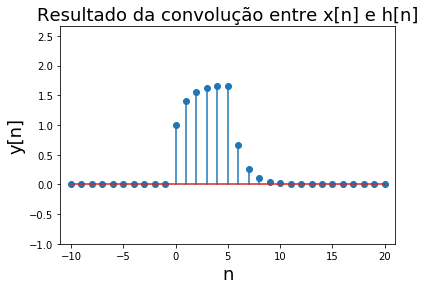

In [5]:
nx = arange(-10,11)
x = degrau(nx)-degrau(nx-6)
nh = arange(0,11)
h = 0.4**nh*degrau(nh)
[ny,y] = convoluir(nx,x,nh,h)
clf()
stem(ny,y)
ylabel('y[n]',fontsize=18)
xlabel('n',fontsize=18)
title('Resultado da convolução entre x[n] e h[n]',fontsize = 18)
axis([min(min(nh),min(nx),min(nh))-1,max(max(nh),max(nx),max(ny))+1, \
      min(min(h),min(x),min(y))-1,max(max(h),max(x),max(y))+1])

**3)** Utilize a sua função para convoluir os seguintes sinais:

\begin{equation}
\large
x[n] = 
\begin{cases}
\frac{1}{4}, \qquad n = 0 \\
\frac{1}{4}\frac{sen(\frac{\pi{n}}{4})}{\frac{\pi{n}}{4}}, \qquad n \neq 0 \\ = \frac{1}{4}sinc(\frac{n}{4}), \qquad -20 \le n \le 20, \\
\end{cases}
\end{equation}

e

\begin{equation}
\large
h[n] = x[n], \qquad -20 \le n \le 20. \\
\end{equation}

Plote $x[n]$ e o resultado da convolução $y[n]$ sobre o intervalo $−20 \le n \le 20$ e se certifiqueque os limites do eixo-x são os mesmos para ambos $x[n]$ e $y[n]$.

Você acha o resultado surpreendente? Por que isso acontece?


[-10, 10, -0.5, 0.5]

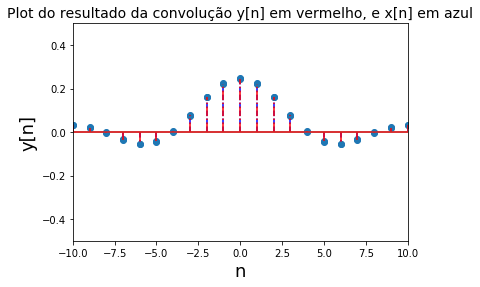

In [12]:
nx = arange(-20,21)
x = sinc(nx/4)/4
h = x
nh = nx

[ny,y] = convoluir(nx,x,nh,h)
clf()
stem(nx,x,linefmt ='--''b')
stem(ny,y,linefmt ='-.''r')
axis([-20,20,-1,1])
ylabel('y[n]',fontsize=18)
xlabel('n',fontsize=18)
title('Plot do resultado da convolução y[n] em vermelho, \
e x[n] em azul',fontsize = 14)
axis([-10,10,-0.5,0.5])

O resultado é esperado pois a Convolução de dois sinais $sinc$ no tempo é a multiplicação de dois sinais retangulares no domínio da frequência, assim, a multiplicação dos dois sinais retangulares resulta em um outro sinal retangular $y[n]$ que no domínio do tempo é igual aos sinais $x[n]$ e $h[n]$

**4)** Sistema de Média Móvel de Primeira-Ordem.

Na Atividade de Simulação passada você considerou um sistema com a seguinte relação entrada-saída:

\begin{equation}
\large
y[n] = a_0x[n] + a_1x[n-1]
\end{equation}

Obtenha analiticamente a resposta ao impulso para esse sistema.

**Resposta:**

\begin{equation}
\large
h[n] = a_0\delta[n] + a_1\delta[n-1]
\end{equation}

A seguir, considere a entrada:

\begin{equation}
\large
x[n] = 5retangulo_{20}[n]sin(\frac{\pi}{12}{n}), \qquad -30 \le n \le 30
\end{equation}

e usa sua função Convoluir para obter a saída do sistema com os seguintes conjuntos de parâmetros e compare estes resultados com aqueles obtidos na atividade de simulação anterior.

**(a)** $a_0 = 1$ e $a_1 = -1$:

Text(0.5,1,'Comparação entre o resultado da Média Móvel em vermelho com o resultado da Convolução em azul')

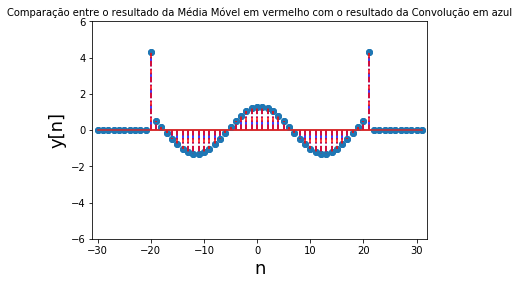

In [14]:
a0 = 1
a1 = -1
coef = [a0,a1]
ordem = 1
nh = arange(0,2)
h = a0*impulso(nh) + a1*impulso(nh-1)
nx = arange(-30,31)
xsin = sin(pi*nx/12)
xret = 5*retangulo(nx,20)
x = xsin*xret

[ny1,y1] = MM(nx,x,ordem,coef) 
[ny,y] = convoluir(nx,x,nh,h) 
clf()
stem(ny,y,linefmt ='-.''b')
stem(ny1,y1,linefmt ='--''r')
axis([min(min(nh),min(nx),min(nh))-1,max(max(nh),max(nx),max(ny))+1, \
      min(min(h),min(x),min(y))-1,max(max(h),max(x),max(y))+1])
ylabel('y[n]',fontsize=18)
xlabel('n',fontsize=18)
title('Comparação entre o resultado da Média Móvel em vermelho \
com o resultado da Convolução em azul',fontsize = 10)

**(b)** $a_0 = a_1 = \frac{1}{2}$

Text(0.5,1,'Comparação entre o resultado da Média Móvel em vermelho com o resultado da Convolução em azul')

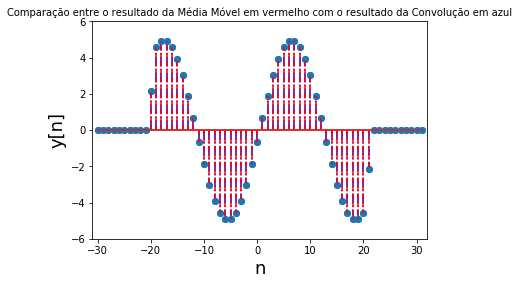

In [15]:
a0 = 1/2
a1 = 1/2
coef = [a0,a1]
ordem = 1
nh = arange(0,2)
h = a0*impulso(nh) + a1*impulso(nh-1)
nx = arange(-30,31)
xsin = sin(pi*nx/12)
xret = 5*retangulo(nx,20)
x = xsin*xret

[ny1,y1] = MM(nx,x,ordem,coef) 
[ny,y] = convoluir(nx,x,nh,h) 
clf()
stem(ny,y,linefmt ='-.''b')
stem(ny1,y1,linefmt ='--''r')
axis([min(min(nh),min(nx),min(nh))-1,max(max(nh),max(nx),max(ny))+1, \
      min(min(h),min(x),min(y))-1,max(max(h),max(x),max(y))+1])
ylabel('y[n]',fontsize=18)
xlabel('n',fontsize=18)
title('Comparação entre o resultado da Média Móvel em vermelho \
com o resultado da Convolução em azul',fontsize = 10)

**4)** Conexão em Cascata de Sistemas LTI.

Considere dois sistemas LTI com as seguintes respostas ao impulso:

\begin{equation}
\large
h_1[n] = (0.8)^nu[n], 
\end{equation}

e

\begin{equation}
\large
h_2[n] = \delta[n] - 0.8\delta[n-1], 
\end{equation}

**(a)** Use a sua função Convoluir para obter a saída do sistema 1 quando a entrada é:

\begin{equation}
\large
x[n] = retangulo_{5}[n]. 
\end{equation}

Ao criar as sequências de entrada e de resposta ao impulso, use bom senso para definir os índices apropriados sobre os quais as sequências serão definidas. Ou seja, você precisa definir $nx$ e $nh$.

[-16, 16, -1.0, 5.570503270400001]

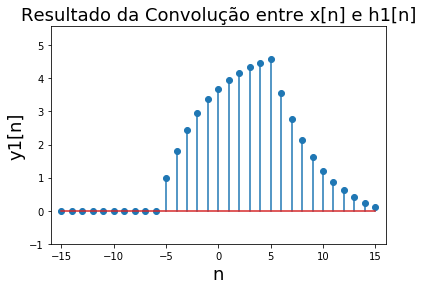

In [17]:
nh = arange(-10,11)
h = 0.8**nh*degrau(nh)
nx = arange(-5,6)
x = retangulo(nx,5)

[ny,y] = convoluir(nx,x,nh,h)

clf()
stem(ny,y)
ylabel('y1[n]',fontsize=18)
xlabel('n',fontsize=18)
title('Resultado da Convolução entre x[n] e h1[n]',fontsize = 18)
axis([min(min(nh),min(nx),min(ny))-1, \
    max(max(nh),max(nx),max(ny))+1,min(min(h),min(x),min(y))-1, \
    max(max(h),max(x),max(y))+1])

**(b)** Use a sua função Convoluir para obter a saída do sistema 2 quando sua entrada é a saída do sistema 1, cuja entrada foi descrita acima.

[-16, 17, -1.0858993459200001, 2.0000000000000004]

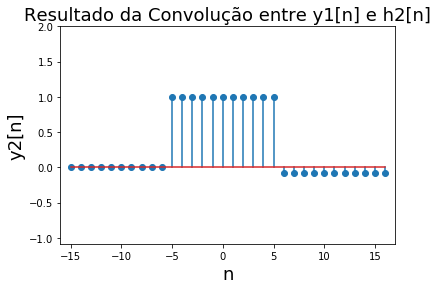

In [18]:
nh1 = arange(-10,11)
h1 = 0.8**nh1*degrau(nh1)
nh2 = arange(0,2)
h2 = impulso(nh2) - 0.8*impulso(nh2-1)
nx = arange(-5,6)
x = retangulo(nx,5)

[ny,y] = convoluir(nx,x,nh1,h1)
nx = ny
x = y
[ny,y] = convoluir(nx,x,nh2,h2)

clf()
stem(ny,y)
ylabel('y2[n]',fontsize=18)
xlabel('n',fontsize=18)
title('Resultado da Convolução entre y1[n] e h2[n]',fontsize = 18)
axis([min(min(nh2),min(nx),min(ny))-1, \
max(max(nh2),max(nx),max(ny))+1,min(min(h1),min(x),min(y))-1, \
max(max(h1),max(y))+1])

**(c)** Use a sua função Convoluir para obter a resposta ao impulso total para uma conexão em cascata dos sistemas 1 e 2. Este resultado é consistente com relação aos resultados anteriores? Comente sobre este resultado e sobre a relação entre os sistemas 1 e 2.

[-6, 6, 0, 2]

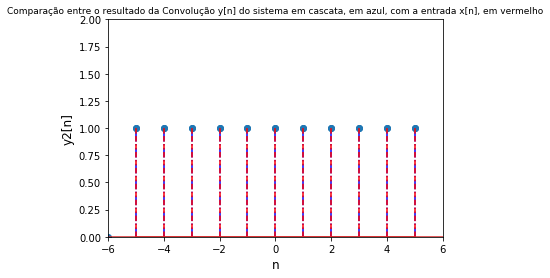

In [22]:
nh1 = arange(-10,11)
h1 = 0.8**nh1*degrau(nh1)
nh2 = arange(0,2)
h2 = impulso(nh2) - 0.8*impulso(nh2-1)
nx = arange(-5,6)
x = retangulo(nx,5)

[nh,h] = convoluir(nh2,h2,nh1,h1)
[ny,y] = convoluir(nh,h,nx,x)

clf()
stem(nx,x,linefmt ='-.''b')
stem(ny,y,linefmt ='--''r')
axis([min(min(nh),min(nx),min(ny))-1, \
max(max(nh),max(nx),max(ny))+1,min(min(h),min(x),min(y))-1, \
max(max(h),max(x),max(y))+1])
ylabel('y2[n]',fontsize=12)
xlabel('n',fontsize=12)
title('Comparação entre o resultado da Convolução y[n] \
do sistema em cascata, em azul, com a entrada x[n], em vermelho', \
fontsize=9)
axis([-6,6,0,2])

Nota-se que a saída do sistema em cascata é igual à entrada do sistema em cascata, o que indica que sistema 1 é o inverso do sistema 2, ou vice-versa.